In [140]:
from pandas import read_csv 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import pmdarima as pm

In [141]:
# read CSV
dataset = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC630/Dataset/us_retail_sales.csv")

# convert to long
dataset_df_long = dataset.melt(id_vars='YEAR', var_name='MONTHS', value_name='SALES_AMOUNT')

# get date as string in YYYY-MM-DD format for time series
dataset_df_long['MONTH_NUM'] = pd.to_datetime(dataset_df_long['MONTHS'], format='%b').dt.month
dataset_df_long['DATE'] = pd.to_datetime(dataset_df_long['YEAR'].astype(str) + '-' + dataset_df_long['MONTH_NUM'].astype(str))

# set index as DATE
dataset_df_long = dataset_df_long.sort_values('DATE').set_index('DATE')

# Set frequency as months
dataset_df_long = dataset_df_long.asfreq("MS")

# Drop NA
dataset_df_long = dataset_df_long[['SALES_AMOUNT']].dropna()

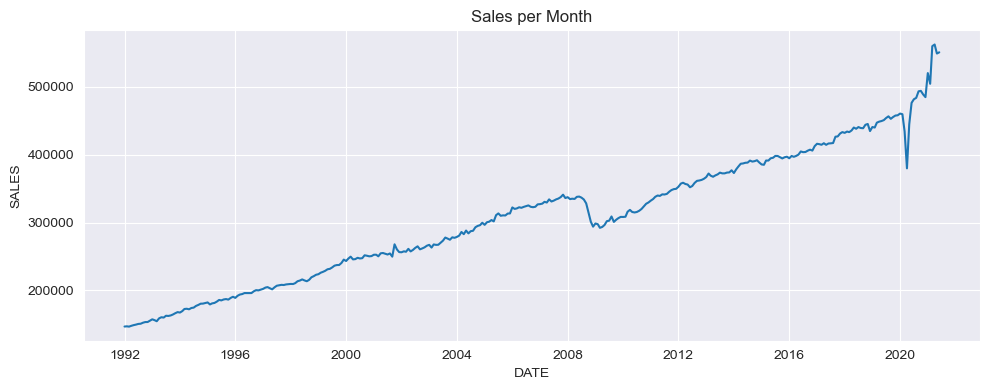

'\nOverall the trend of sales are increasing with some decrease in between.\n'

In [142]:
# Plot the data with proper labeling and make some observations on the graph.
plt.figure(figsize=(10,4))
plt.plot(dataset_df_long.index, dataset_df_long['SALES_AMOUNT'])
plt.title('Sales per Month')
plt.xlabel("DATE")
plt.ylabel("SALES")
plt.tight_layout()
plt.show()

"""
Overall the trend of sales are increasing with some decrease in between.
"""

In [143]:
# Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
train = dataset_df_long.iloc[:-12]
test = dataset_df_long.iloc[-12:]

In [144]:
train.head()

,SALES_AMOUNT
DATE,
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0


In [145]:
test.head()

,SALES_AMOUNT
DATE,
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0


In [146]:
# Use the training set to build a predictive model for the monthly retail sales.
model = SARIMAX(train['SALES_AMOUNT'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

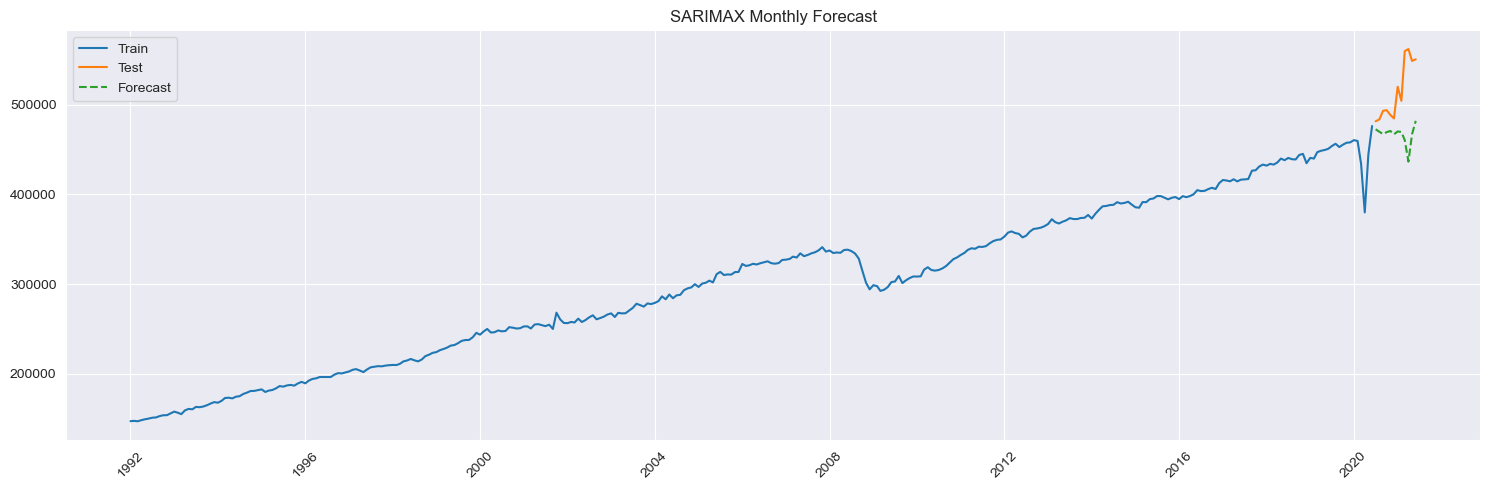

In [147]:
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15,5))
plt.plot(train.index, train['SALES_AMOUNT'], label='Train')
plt.plot(test.index, test['SALES_AMOUNT'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('SARIMAX Monthly Forecast')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
rmse = np.sqrt(mean_squared_error(test['SALES_AMOUNT'], forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 59819.071035717614
